# 몬테카를로 오차 분석

알고리즘 순서 

    1. 자기 상관 함수 계산: 타우 (lag)를 베타별로 설정하고, 각 타우에 대해 새로운 E와 spin를 계산한다.
	2. 새로운 E와 spin 계산: 각 타우에 대해 새로운 E와 spin를 계산하여 리스트에 저장한다.
	3. 평균과 분산 계산: 계산된 새로운 E와 delta에 대해 평균과 분산을 구한다.
	4. 에러바 그리기: 베타별로 평균 값을 중심으로 하고, 분산을 에러바로 표시하는 그래프를 그린다.

자기 상관 함수와 이것을 나타내는 지연 시간(lag)인 타우(tau)는 특정 시간 지연만큼 이동한 자기 자신과의 상관 관계를 나타낸다.

자기 상관 함수는 시계열 데이터가 자기 자신과 얼마나 비슷한지를 평가하는 데 사용된다. 데이터가 이전의 값에 따라 얼마나 의존적인지를 보여줍니다.

$ \text{Autocorrelation}(\tau) = \frac{\sum_{t=1}^{T-\tau} (X_t - \bar{X})(X_{t+\tau} - \bar{X})}{\sum_{t=1}^{T} (X_t - \bar{X})^2} $

여기서:
- $ X_t $: 시계열 데이터의 값
- $ \bar{X} $: 시계열 데이터의 평균
- $ T $: 시계열 데이터의 길이
- $ \tau $: 지연 시간(lag)

자기 상관 함수는 주어진 시계열 데이터에서 어떤 지연 시간 $\tau$ 에서의 상관 관계를 측정한다. $ \tau $값이 클수록 데이터 포인트 간의 상관 관계는 점점 줄어들며, 일반적으로 시계열 데이터가 랜덤 또는 무작위로 보일 때 $ \tau $ 값이 길어질수록 상관 관계는 거의 사라진다.

In [21]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

E_list: [-2.16, -7.816, -12.612, -30.944, -46.324, -49.032, -49.088, -49.904, -49.624, -50.0]
spin_list: [-0.048160000000000064, -0.12311999999999997, 0.23400000000000054, 0.7624799999999976, 0.9596799999999942, 0.9903200000000011, 0.9908800000000002, 0.9990399999999995, 0.9962399999999992, 1.0]


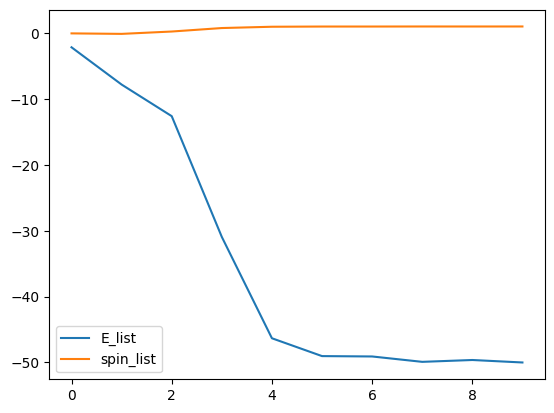

In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt

def neighbor(L, N):
    neighbor_point = []

    x = N % L
    y = N // L

    if x == 0:
        temp_x = x + L - 1
        temp_y = y
        neighbor_point.append([temp_x, y])
    else:
        neighbor_point.append([x - 1, y])

    if x == L - 1:
        temp_x = x - L + 1
        temp_y = y
        neighbor_point.append([temp_x, y])
    else:
        neighbor_point.append([x + 1, y])

    if y == 0:
        temp_x = x
        temp_y = (L - 1)
        neighbor_point.append([x, temp_y])
    else:
        neighbor_point.append([x, y - 1])

    if y == L - 1:
        temp_x = x
        temp_y = 0
        neighbor_point.append([x, temp_y])
    else:
        neighbor_point.append([x, y + 1])

    return neighbor_point

def energy(L, A) : #L : 행의 갯수, A: 행렬 이름
    E = 0
    for i in range(L ** 2) :
        target_x = i % L
        target_y = i // L

        for i in neighbor(L, i) :
            if A[target_x][target_y] == A[i[0]][i[1]] :
                E -= 1
            else :
                E += 1
    E = E/2
    # print(E) # double count 문제 해결하기 위해 "/2"함
    return E


L = 5
n = 1000
beta = np.arange(0.1, 1.1, 0.1)

S = np.random.randint(0, 2, (L, L)) * 2 - 1
S[0][0] = +1
E_list = []
entire_E = []
spin_list = []
entire_spin  = []

for temp_beta in beta:
    avg_energy = 0
    avg_spin = 0
    for _ in range(n):
        U = S.copy()
        random_row = np.random.randint(0, L)
        random_col = np.random.randint(0, L)
        U[random_row, random_col] *= -1  # 스핀을 뒤집음

        temp_sum = 0
        for i,j in neighbor(L, random_row * L + random_col) :
            temp_sum += S[i][j]
        delta_E = 2 * S[random_row][random_col] * temp_sum

        if delta_E <= 0 or np.random.random() < np.exp(-temp_beta * delta_E):
            S = U

        avg_energy += energy(L, S)
        entire_E.append(energy(L, S))
        avg_spin += np.sum(S) / (L ** 2)
        entire_spin.append(avg_spin)

    avg_energy /= n
    avg_spin /= n
    E_list.append(avg_energy)
    spin_list.append(avg_spin)

print('E_list:', E_list)
print('spin_list:', spin_list)

plt.plot(E_list, label = 'E_list')
plt.plot(spin_list, label = 'spin_list')
plt.legend()
plt.show()

In [23]:
print('entire_E:', entire_E)
print(len(entire_E))
print('entire_spin:', entire_spin)
print(len(entire_spin))

entire_E: [6.0, 6.0, 6.0, 6.0, 6.0, 2.0, 6.0, 6.0, 6.0, -2.0, -2.0, -10.0, -10.0, -18.0, -18.0, -18.0, -18.0, -22.0, -22.0, -18.0, -18.0, -18.0, -18.0, -14.0, -14.0, -10.0, -6.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -10.0, -14.0, -14.0, -10.0, -10.0, -2.0, 2.0, -2.0, -10.0, -6.0, -6.0, -2.0, 2.0, -2.0, -2.0, -2.0, -6.0, -10.0, -10.0, -10.0, -2.0, -6.0, -2.0, -2.0, -2.0, -2.0, -2.0, -6.0, -2.0, -6.0, -14.0, -10.0, -10.0, -10.0, -14.0, -14.0, -14.0, -10.0, -6.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -6.0, -2.0, -6.0, -2.0, -2.0, -2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 6.0, 2.0, 6.0, 2.0, 10.0, 10.0, 14.0, 10.0, 10.0, 6.0, 6.0, 10.0, 10.0, 6.0, 6.0, 6.0, 2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 6.0, 6.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 6.0, 2.0, -2.0, -6.0, -6.0, -6.0, -2.0, 2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, 2.0, 6.0, 6.0, 10.0, 10.0, 2.0, -2.0, -2.0, -2.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -10.0, -14.0, -6.0,

In [41]:
tau_list = []
for i in range(len(beta)):
    start = 0 + i * n
    end = 999 + i * n
    temp_spin = entire_spin[start:end]

    A = pd.Series(temp_spin)
    for k in range(1, 100):
        tau = (A.autocorr(k))
    tau_list.append(tau)

print(tau_list)

[0.8154237202980269, 0.7932302238963445, 0.9425067774810127, 0.9973486935336849, 0.9999074319845542, 0.9999825875214919, 0.9999746462354179, 0.99999943768175, 0.9999918633134115, 1.0]


In [45]:
avg_E = []
avg_spin = []
err_E = []
err_spin = []

for i in range(1, 11):
    start = (i - 1) * 1000
    end = i * 1000
    beta_E = entire_E[start + 200:end]
    beta_spin = entire_spin[start + 200:end]

    avg_E.append(np.mean(beta_E))
    avg_spin.append(np.mean(beta_spin))

    tau = round(tau_list[i-1]) * 3
    new_E = beta_E[::tau]
    new_spin = beta_spin[::tau]

    temp_err = np.std(new_E) / np.sqrt(len(new_E) -1)
    err_E.append(temp_err)
    temp_err = np.std(new_spin) / np.sqrt(len(new_spin) -1)
    err_spin.append(temp_err)



print(err_E)
print(len(err_E))
print(err_spin)
print(len(err_spin))

[0.4727331947513972, 0.5664891927647037, 0.7849111512186822, 0.905226646649226, 0.3536828902498005, 0.1549075936701793, 0.18358351808927123, 0.05958621196985117, 0.1376983622015831, 0.0]
10
[1.2281226128260332, 2.458947618778661, 6.817107011395865, 11.142624029023729, 13.498463014094552, 14.014735994403772, 14.030339032828687, 14.155593254217626, 14.085565928930702, 14.177446878757827]
10


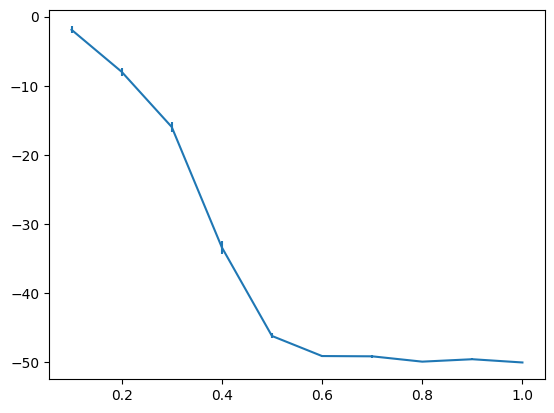

In [46]:
beta = np.arange(0.1, 1.1, 0.1)
plt.errorbar(beta, avg_E, err_E, label = 'E')
plt.show()

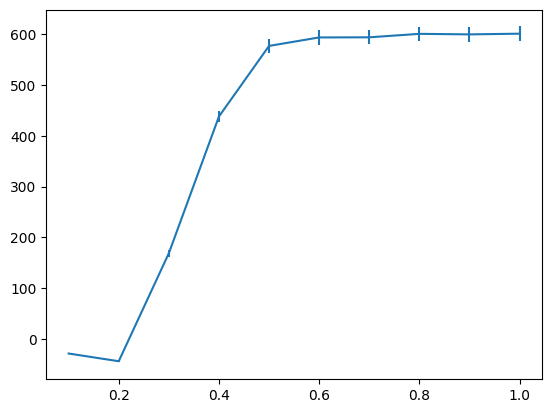

In [47]:
plt.errorbar(beta, avg_spin, err_spin, label = 'spin')
plt.show()